# Algorithmes de régression

## Chargement et préparation des données

In [1]:
# Update libraries
!pip install -U pip
!pip install -U scikit-learn
!pip install graphviz
!pip install xgboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils 

In [2]:
# Install also graphviz utility
!apt update
!apt -y install graphviz

Hit:1 http://security.debian.org/debian-security buster/updates InRelease
Hit:2 http://deb.debian.org/debian buster InRelease
Hit:3 http://deb.debian.org/debian buster-updates InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
34 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-6+deb10u1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [3]:
import pandas as pd
import numpy as np
import prepare

In [4]:
# BOSTON dataset
train_X, test_X, train_y, test_y = prepare.prepare_boston()

## Entrainement et évaluation des modèles

In [5]:
import sklearn.metrics
from sklearn.tree import DecisionTreeRegressor

In [6]:
# Model creation
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Training
regressor.fit(train_X, train_y)

# Predictions
pred_y = regressor.predict(test_X)

# Evaluation
print(sklearn.metrics.explained_variance_score(test_y, pred_y))

0.8819874799612748


In [7]:
# Mean absolute error
sklearn.metrics.mean_absolute_error(test_y, pred_y)

2.4032225187372247

In [8]:
# Median absolute error
sklearn.metrics.median_absolute_error(test_y, pred_y)

2.08743243243243

In [9]:
# Mean squared error
sklearn.metrics.mean_squared_error(test_y, pred_y)

8.674218547391291

In [10]:
# Root mean squared error
np.sqrt(sklearn.metrics.mean_squared_error(test_y, pred_y))

2.9452026326538707

In [11]:
# Explained variance
sklearn.metrics.explained_variance_score(test_y, pred_y)

0.8819874799612748

In [12]:
# Determination coefficient (R2 score)
sklearn.metrics.r2_score(test_y, pred_y)

0.881715927181506

In [13]:
# Maximum error
sklearn.metrics.max_error(test_y, pred_y)

8.685000000000002

In [14]:
# Mean average percentage error
sklearn.metrics.mean_absolute_percentage_error(test_y, pred_y)

0.13443950094579846

In [15]:
# Mean squared log error
sklearn.metrics.mean_squared_log_error(test_y, pred_y)

0.026007697234205082

## Utilisation des algorithmes de classification

### Arbres de décision et algorithmes dérivés

In [16]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=5, random_state=42, criterion='mse')
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(sklearn.metrics.explained_variance_score(test_y, pred_y))

0.8819874799612748


In [17]:
# Feature importances
regressor.feature_importances_

array([0.09536135, 0.        , 0.00264675, 0.        , 0.03052634,
       0.61468233, 0.00158261, 0.01004725, 0.        , 0.        ,
       0.01073655, 0.00133507, 0.23308175])

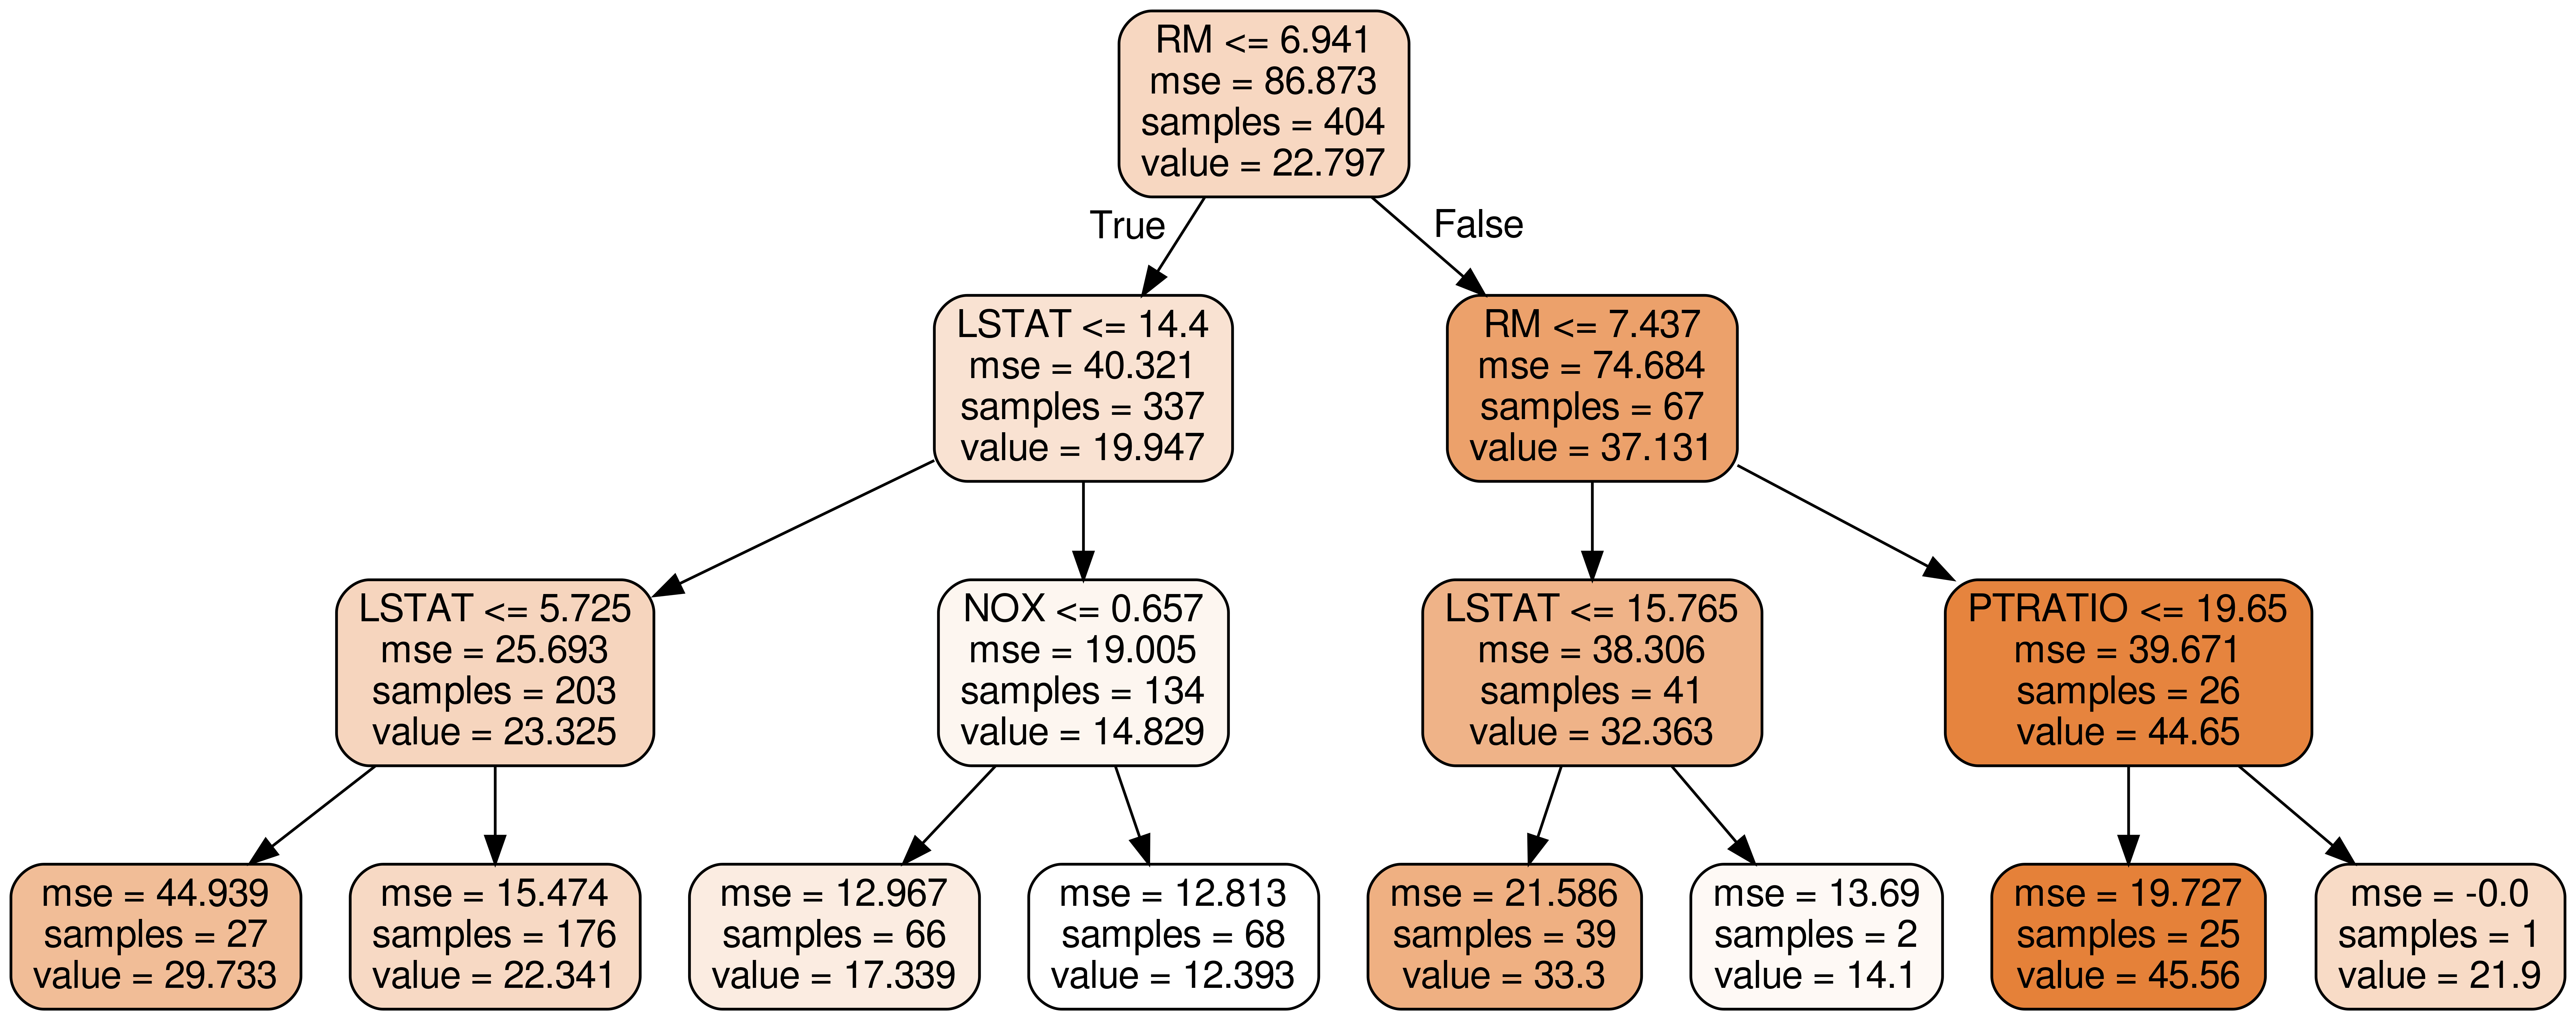

In [18]:
# Tree creation
from sklearn.tree import export_graphviz
from IPython.display import Image

# Decision tree with max depth = 3
regressor = DecisionTreeRegressor(max_depth=3, random_state=42, criterion='mse')
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)

# Create png file
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
export_graphviz(regressor, out_file='temp/tree_boston.dot', feature_names=feature_names, rounded=True, filled=True)
!dot -Tpng temp/tree_boston.dot -o temp/tree_boston.png -Gdpi=600
Image(filename = 'temp/tree_boston.png')

In [19]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, max_depth=4, random_state=42, criterion='mse')
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(sklearn.metrics.mean_squared_error(test_y, pred_y))

10.336771058560412


In [20]:
# Feature importances
regressor.feature_importances_

array([3.60710390e-02, 9.14889812e-04, 8.33503379e-03, 4.82758878e-03,
       1.30688112e-02, 5.12260017e-01, 3.22264254e-03, 3.08840153e-02,
       9.57142157e-05, 1.19381872e-02, 1.87895898e-02, 6.59843939e-03,
       3.52994032e-01])

In [21]:
# XGBoost
import xgboost

xgboost = xgboost.XGBRegressor(max_depth=5, subsample=0.7, sampling_method='uniform', seed=42, n_estimators=20)
xgboost.fit(train_X, train_y)
pred_y = xgboost.predict(test_X)
print(sklearn.metrics.mean_squared_error(test_y, pred_y))

10.59830908059424


In [22]:
# and feature importances
xgboost.feature_importances_

array([0.02906367, 0.00675394, 0.01828919, 0.01848564, 0.08464885,
       0.31305784, 0.01454039, 0.03152963, 0.02486725, 0.03771038,
       0.03016509, 0.02626149, 0.36462662], dtype=float32)

### KNN

In [23]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=3, weights='distance')
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(sklearn.metrics.mean_squared_error(test_y, pred_y))

20.061245624001867


In [24]:
# Be carefull : no errors on training data!!
pred_y_train = regressor.predict(train_X)
print(sklearn.metrics.mean_squared_error(train_y, pred_y_train))

0.0


### SVM (SVR : SVM for Regression)

In [25]:
from sklearn.svm import SVR

regressor = SVR(kernel='linear', C=0.05)
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(sklearn.metrics.mean_squared_error(test_y, pred_y))

27.197912228445325


## Régression linéaire et variantes

In [26]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

28.02570186948499


In [27]:
# Regression coefficients
regressor.coef_

array([ 2.31663318e-02,  1.66826494e-03,  2.56646848e-02,  3.16764647e+00,
       -1.54366811e+01,  4.90731544e+00, -5.88145304e-03, -1.15437553e+00,
        1.29222513e-01, -8.90055909e-04, -9.09406332e-01,  1.26558793e-02,
       -5.00701788e-01])

In [28]:
# Intercept
regressor.intercept_

22.723249676973637

In [29]:
# Linear regression with normalisation pipeline (to compare coefficients)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

regressor = LinearRegression()
pipeline = Pipeline([
    ('stand', StandardScaler()),
    ('ols', regressor)])
pipeline.fit(train_X, train_y)
pred_y = pipeline.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

28.025701869484866


In [30]:
# Regression coefficients
regressor.coef_

array([ 0.05993926,  0.03857664,  0.17672906,  0.81765477, -1.81471633,
        3.4771921 , -0.16444692, -2.35982641,  0.19013866, -0.14771979,
       -2.02428477,  1.15741987, -3.5557716 ])

In [31]:
# Ridge regression
from sklearn.linear_model import Ridge
from sklearn import metrics

regressor = Ridge(alpha=1)
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

28.10468386843545


In [32]:
# Intercept
regressor.intercept_

18.038820023835108

In [33]:
# Coefficients
regressor.coef_

array([-2.45107265e-02,  4.87745441e-03, -3.37352827e-03,  2.93159018e+00,
       -8.38733871e+00,  4.91678296e+00, -1.07776244e-02, -1.05604633e+00,
        1.18638794e-01, -1.63975588e-03, -8.28984514e-01,  1.29281592e-02,
       -5.14609143e-01])

In [34]:
# Ridge cross validation (Ridge CV)
from sklearn.linear_model import RidgeCV

regressor = RidgeCV(alphas=np.logspace(-6, 6, 13))
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

28.02289405059946


In [35]:
# Best alpha
regressor.alpha_

0.1

In [36]:
# Coefficients
regressor.coef_

array([ 1.48575238e-02,  2.20240647e-03,  2.07524933e-02,  3.13460942e+00,
       -1.42415201e+01,  4.91187899e+00, -6.73983202e-03, -1.13768110e+00,
        1.27306590e-01, -1.01580218e-03, -8.95584246e-01,  1.27031796e-02,
       -5.02811125e-01])

In [37]:
# Intercept
regressor.intercept_

21.90512213897137

In [38]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn import metrics

regressor = Lasso(alpha=1)
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

27.460120307027886


In [39]:
# Intercept
regressor.intercept_

29.58110308017803

In [40]:
# Coefficients
regressor.coef_

array([ 0.        ,  0.00801932, -0.        ,  0.        , -0.        ,
        1.98588129,  0.02067636, -0.35470835,  0.        , -0.00321087,
       -0.70701326,  0.01118174, -0.74239054])

In [41]:
# Feature with no impact
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
[names[i] for i in np.where(regressor.coef_ == 0)[0]]

['CRIM', 'INDUS', 'CHAS', 'NOX', 'RAD']

In [42]:
# Lasso Regression with cross validation
from sklearn.linear_model import LassoCV

regressor = LassoCV(n_alphas=500)
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

27.30981030405593


In [43]:
# Intercept
regressor.intercept_

24.690946489781467

In [44]:
# Coefficients
regressor.coef_

array([ 0.        ,  0.00799244, -0.        ,  0.        , -0.        ,
        2.8876251 ,  0.00997177, -0.52452129,  0.        , -0.00338438,
       -0.72666141,  0.01196077, -0.68494933])

In [45]:
# Best alpha
regressor.alpha_

0.7112607795804332

## Régression polynomiale : préprocess puis application d'un algorithme de régression linéaire

In [46]:
# Preprocess + Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn import metrics

# Preprocess (create polynomial features)
poly = PolynomialFeatures(degree=2, include_bias=False)
train_X = poly.fit_transform(train_X)
test_X = poly.transform(test_X)

# Lasso
regressor = Lasso(max_iter=15000)
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

14.413339690744131


## Prédictions et séries temporelles

### Création des datasets

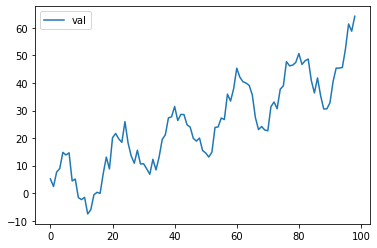

In [47]:
# Create dataset 1: with seasonality
import math
import random

trend = pd.DataFrame([x/2 for x in range(1, 100)], columns=['val'])
season = pd.DataFrame([10*math.sin(x/3) for x in range(1, 100)], columns=['val'])
random.seed(42)
noise = pd.DataFrame([random.random()*10-5 for x in range(1, 100)], columns=['val'])
total = pd.DataFrame(trend['val'] + season['val'] + noise['val'])

total.plot()

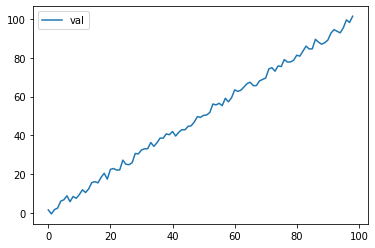

In [48]:
# Create dataset 2: noisy trend
import pandas as pd
import random

random.seed(42)
data = pd.DataFrame([x + 5 * random.random() - 5/2 for x in range(1, 100)], columns=['val'])

data.plot()

In [49]:
# Utility to create horizons
def create_horizon(data, size):
    for i in range(1, size+1):
        data['minus'+str(i)] = data['val'].shift(i)
    data.dropna(inplace=True)
    return data

### Prédiction avec un horizon

In [50]:
# Create horizon
data = create_horizon(data, 3)
data.head()

,val,minus1,minus2,minus3
3,2.616054,1.875147,-0.374946,1.697134
4,6.182356,2.616054,1.875147,-0.374946
5,6.883497,6.182356,2.616054,1.875147
6,8.960898,6.883497,6.182356,2.616054
7,5.934694,8.960898,6.883497,6.182356


In [51]:
# Split train / test
y = data['val']
X = data.drop('val', axis=1)

train_y = y[:80]
test_y = y[80:]
train_X = X[:80]
test_X = X[80:]

In [52]:
# Classical regression (Lasso with CV)
from sklearn.linear_model import LassoCV
from sklearn import metrics

regressor = LassoCV(n_alphas=200)
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

3.947638186839044


In [53]:
# Intercept
regressor.intercept_

2.117511819151254

In [54]:
# Coefficients
regressor.coef_

array([0.40443332, 0.2642424 , 0.32725904])

In [55]:
# Best alpha
regressor.alpha_

0.5387025194983053

In [56]:
# Naive regression
print(metrics.mean_squared_error(test_y, test_X['minus1']))

5.705173039858824


### Prédiction du delta

In [57]:
# Create delta to predict
data['dif'] = data['val'] - data['minus1']

In [58]:
# New dataset with deltas
y = data['dif']
X = data.drop(['dif', 'val'], axis=1)

train_y = y[:80]
test_y = y[80:]
train_X = X[:80]
test_X = X[80:]

In [59]:
# Regression with LassoCV
from sklearn.linear_model import LassoCV
from sklearn import metrics

regressor = LassoCV(n_alphas=200, max_iter=50000)
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

3.8863961308046067


In [60]:
# Intercept
regressor.intercept_

2.0656191546880747

In [61]:
# Coefficients
regressor.coef_

array([-0.58689223,  0.25730544,  0.32654653])

### Régression classique sur la première série (avec saisonnalité)

In [62]:
# Create dataset with horizon
df = create_horizon(total, 3)

y = df['val']
X = df.drop('val', axis=1)

train_y = y[:80]
test_y = y[80:]
train_X = X[:80]
test_X = X[80:]

In [63]:
# Do classical regression
from sklearn.linear_model import LassoCV
from sklearn import metrics

regressor = LassoCV(n_alphas=200)
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

28.989896851213274


In [64]:
# Compare with naive regressor
print(metrics.mean_squared_error(test_y, test_X['minus1']))

26.76382452685415


In [65]:
# Same with horizon size of 18
from sklearn.linear_model import LassoCV
from sklearn import metrics

df = create_horizon(total, 18)

y = df['val']
X = df.drop('val', axis=1)

train_y = y[:45]
test_y = y[45:]
train_X = X[:45]
test_X = X[45:]

regressor = LassoCV(n_alphas=200)
regressor.fit(train_X, train_y)
pred_y = regressor.predict(test_X)
print(metrics.mean_squared_error(test_y, pred_y))

13.539531415059201


In [66]:
# Intercept
regressor.intercept_

3.6327489978047325

In [67]:
# Coefficients
regressor.coef_

array([ 0.32414419,  0.10399876,  0.06847038,  0.20323839, -0.        ,
       -0.        ,  0.08746358, -0.15565466, -0.00234656,  0.        ,
       -0.15263632,  0.        ,  0.        ,  0.        ,  0.33292237,
        0.02463579,  0.0525523 ,  0.14241244])

### Algorithmes dédiés 

In [68]:
# Prepare dataset
trend = pd.DataFrame([x/2 for x in range(1, 100)], columns=['val'])
season = pd.DataFrame([10*math.sin(x/3) for x in range(1, 100)], columns=['val'])
random.seed(42)
noise = pd.DataFrame([random.random()*10-5 for x in range(1, 100)], columns=['val'])
total = pd.DataFrame(trend['val'] + season['val'] + noise['val'])

data = total.copy()
train_y = data[:80]
test_y = data[80:]

In [69]:
# Auto regression (AR)
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(train_y, lags=18, trend='t')
model_fit = model.fit()
pred = model_fit.predict(80, 98)

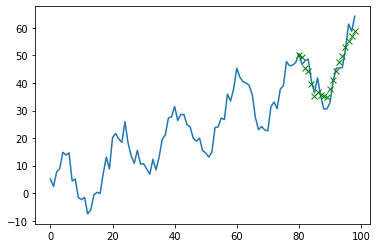

In [70]:
import matplotlib.pyplot as plt

data['val'].plot()
plt.plot(pred, 'gx')

In [71]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_y, order=(18, 1, 4))
model_fit = model.fit()
pred = model_fit.predict(80, 98)

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


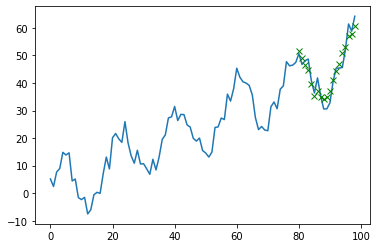

In [72]:
data['val'].plot()
plt.plot(pred, 'gx')

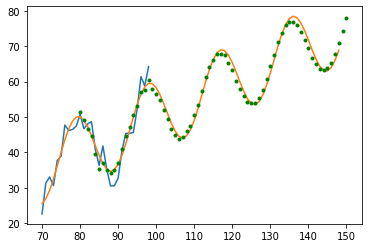

In [73]:
# ARIMA on whole curve (blue: noisy, orange: ideal, green: predictions)
fix = pd.DataFrame([x/2 for x in range(1, 150)], columns=['val'])
variable = pd.DataFrame([10*math.sin(x/3) for x in range(1, 150)], columns=['val'])
theory = fix + variable
data['val'][70:].plot()
theory['val'][70:].plot()
pred = model_fit.predict(80, 150)
plt.plot(pred, 'g.')